<a href="https://colab.research.google.com/github/mvfelipelli/DataAnalyticsPortfolio/blob/main/candidatos_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get libs and import packages

In [103]:
import requests
import zipfile
import pandas as pd
import io
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_columns', None)

## Import Data

In [104]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_candidatos = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [105]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand_complementar/consulta_cand_complementar_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_cand_compl = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


In [106]:

# URL do arquivo ZIP
url = 'https://cdn.tse.jus.br/estatistica/sead/odsele/bem_candidato/bem_candidato_2024.zip'

# Faz o download do arquivo
response = requests.get(url)
if response.status_code == 200:
    # Abre o arquivo ZIP em memória
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
        # Lista os arquivos dentro do ZIP
        file_names = zip_ref.namelist()

        # Procura por um arquivo CSV
        for file_name in file_names:
            if file_name.endswith('BRASIL.csv'):
                # Lê o arquivo CSV diretamente do ZIP em um DataFrame
                with zip_ref.open(file_name) as file:
                    df_bens_cand = pd.read_csv(file,sep=';', encoding='latin')
else:
    print(f"Falha ao baixar o arquivo: {response.status_code}")


## Ask

## Prepare


In [110]:
def verificar_freq_colunas(df):
    sns.set(style="whitegrid")

    object_columns = df.select_dtypes(include='object').columns

    for col in object_columns:
        #somente os 20 primeiros
        freq = df[col].value_counts(normalize=True).head(20)*100

        plt.figure(figsize=(10, 5))

        ax = sns.barplot(x=freq.index, y=freq.values, hue=freq.index,palette="Blues_d")

        # Adicionar os valores diretamente sobre as barras
        for index, value in enumerate(freq.values):
            ax.text(index, value, f'{value:,.2f}%', ha='center', va='bottom', fontsize=10, color='black')

        # Adicionar título e rótulos
        plt.title(f'Frequência de valores na coluna: {col}', fontsize=16)
        plt.xlabel('Valores', fontsize=12)
        plt.ylabel('Frequência', fontsize=12)

        plt.xticks(rotation=45, ha='right')

        # Mostrar o gráfico
        plt.tight_layout()
        plt.show();

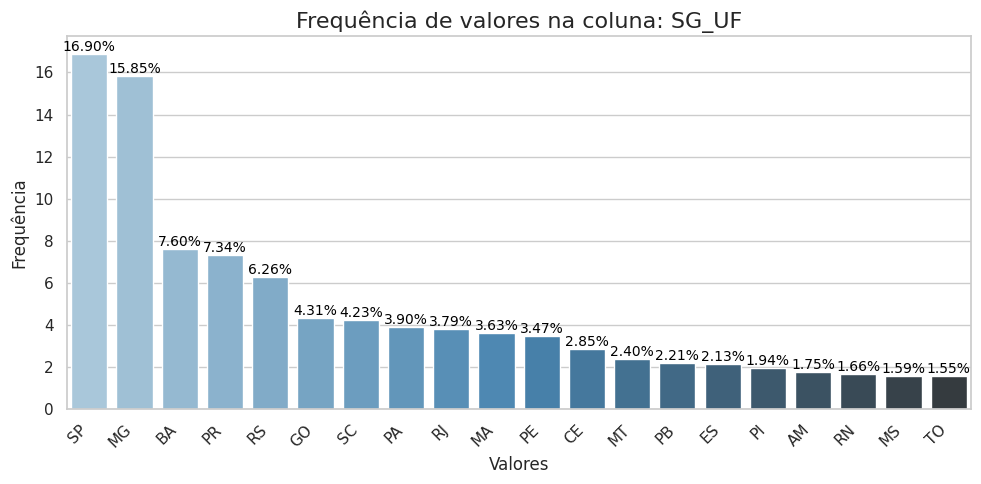

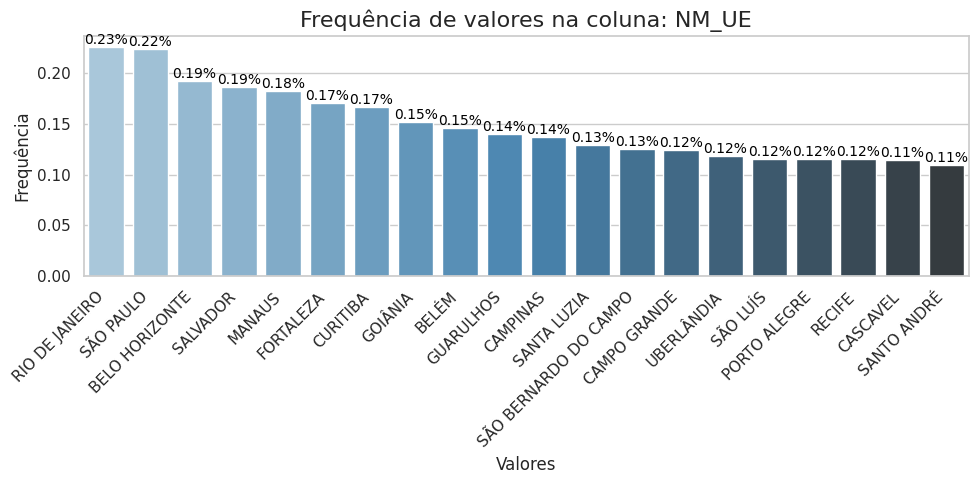

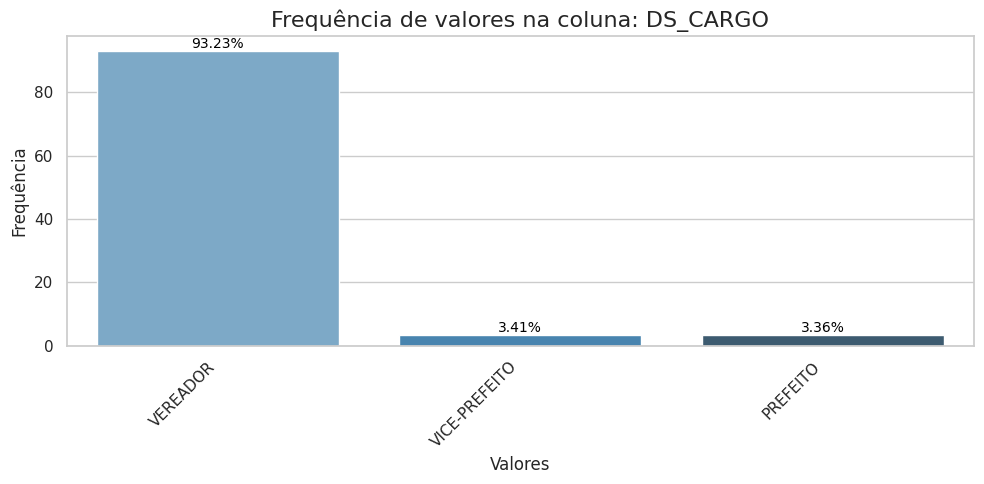

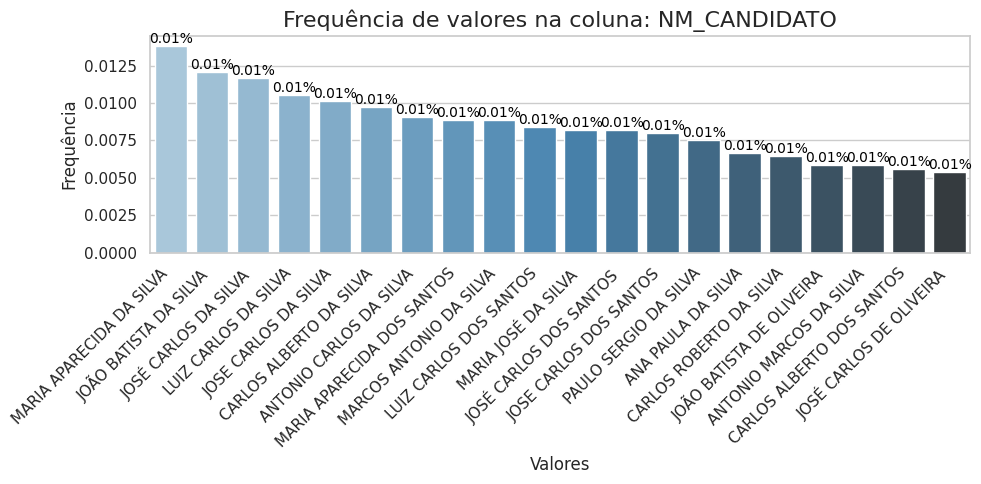

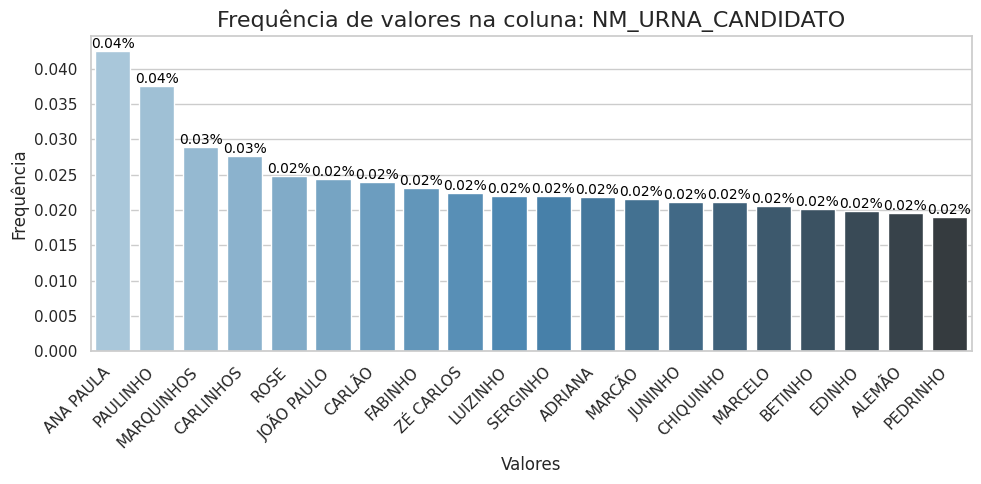

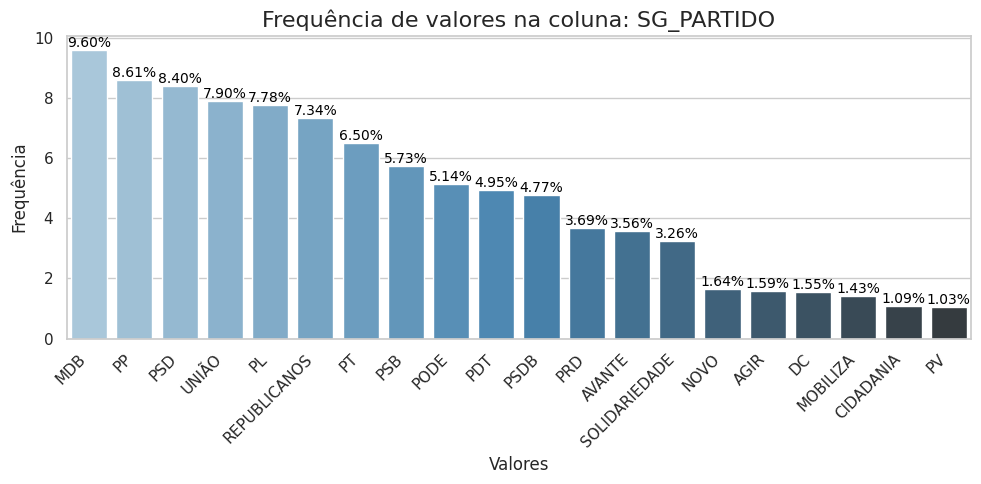

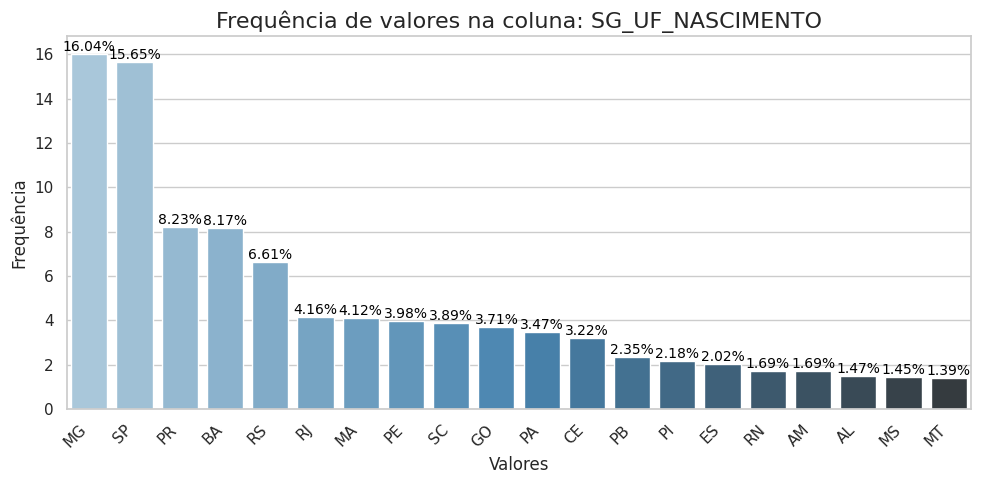

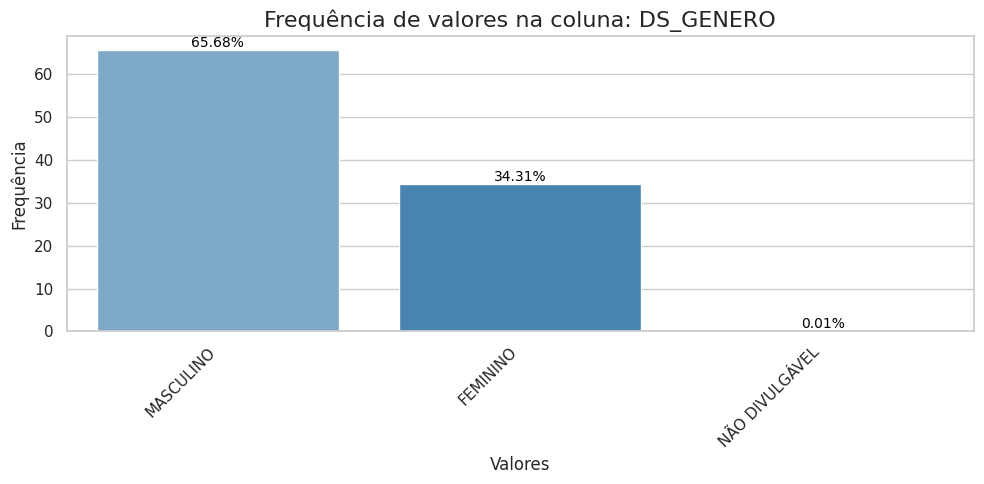

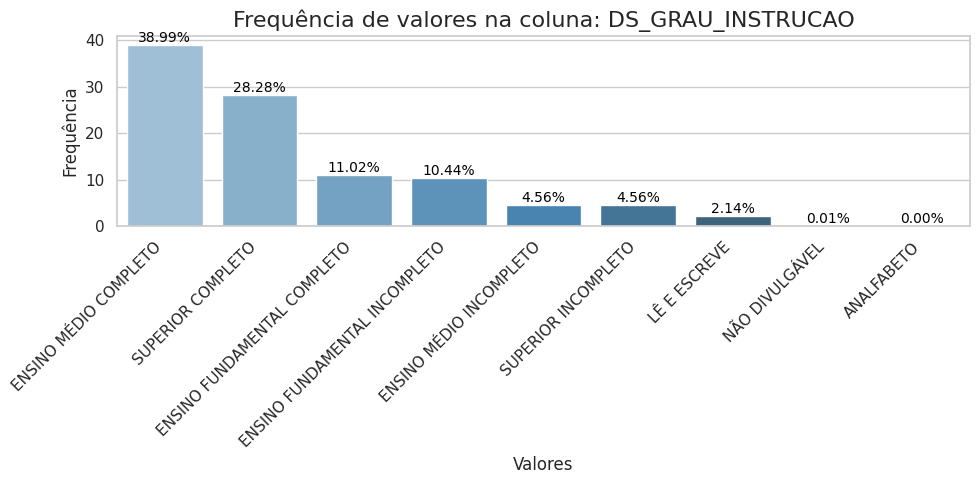

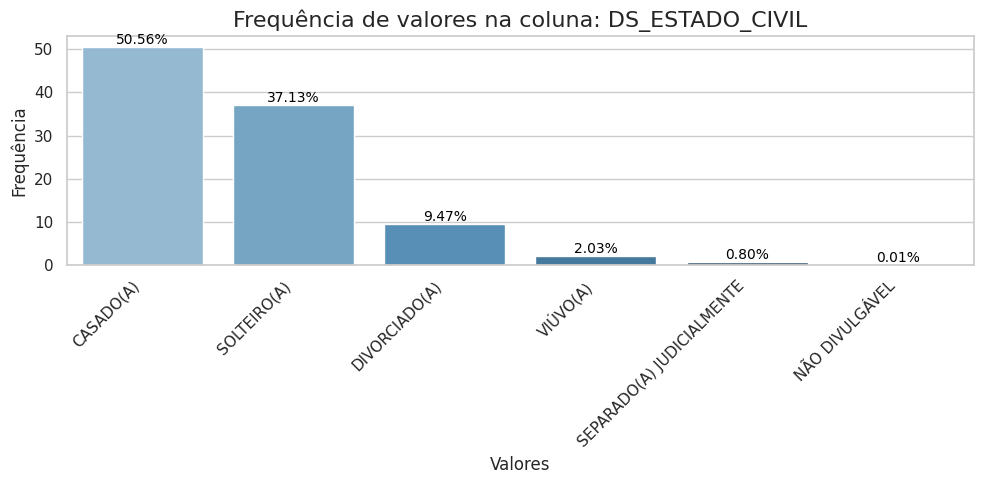

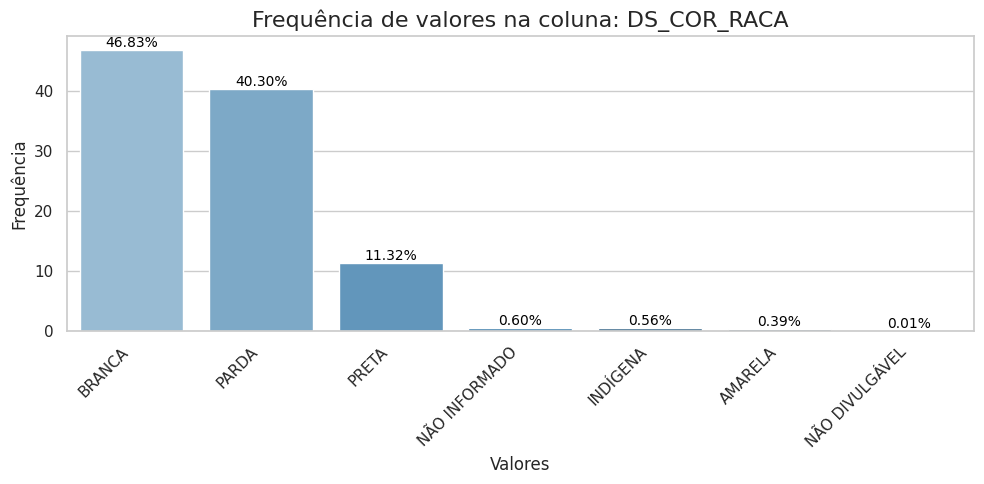

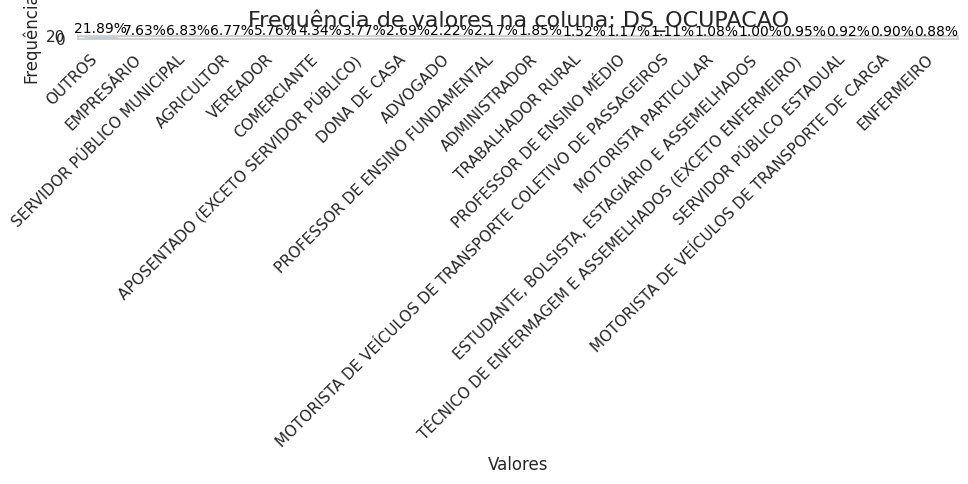

In [115]:
verificar_freq_colunas(df_candidatos)

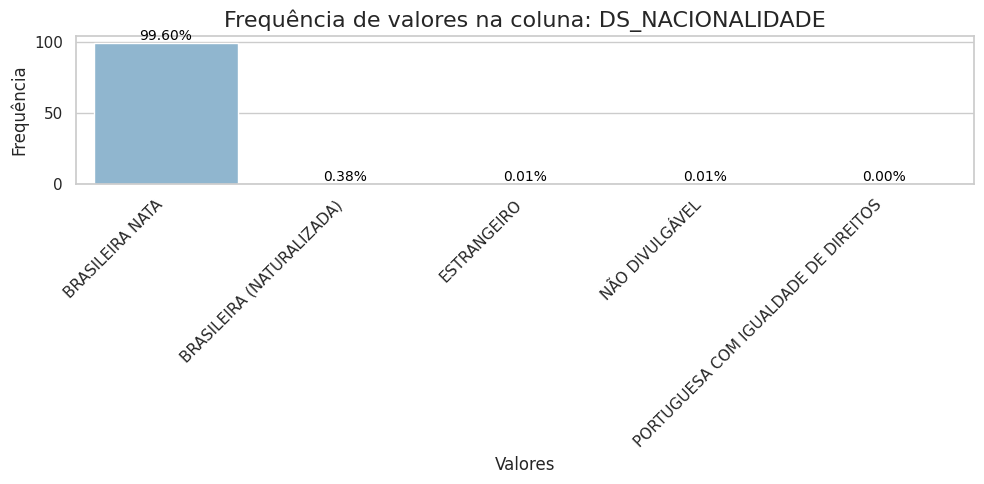

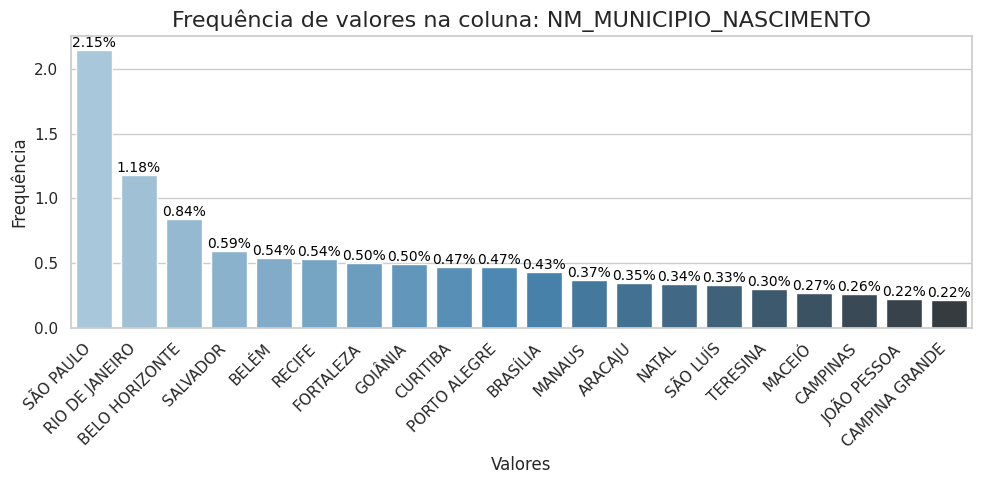

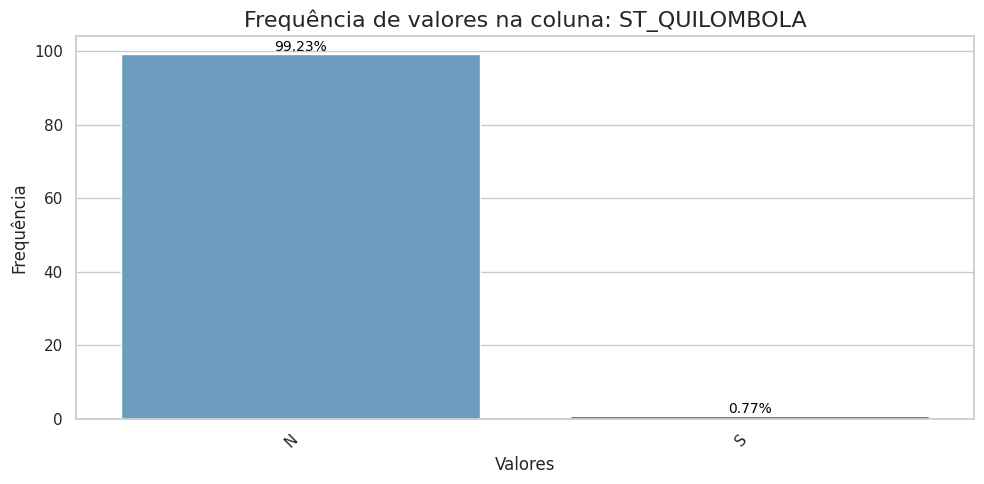

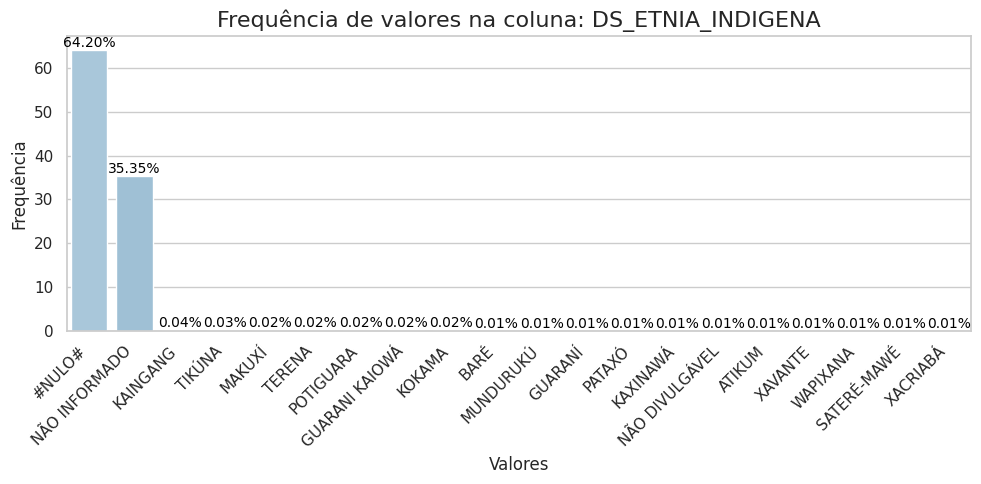

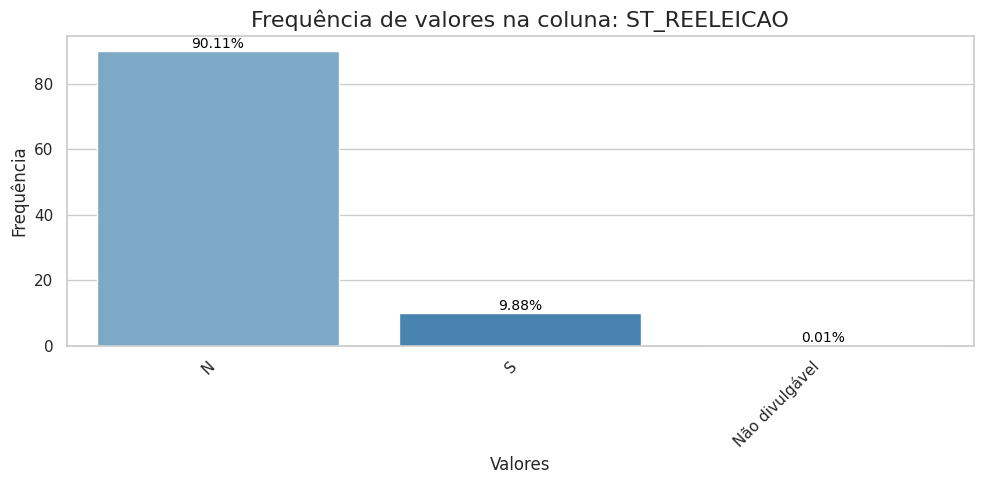

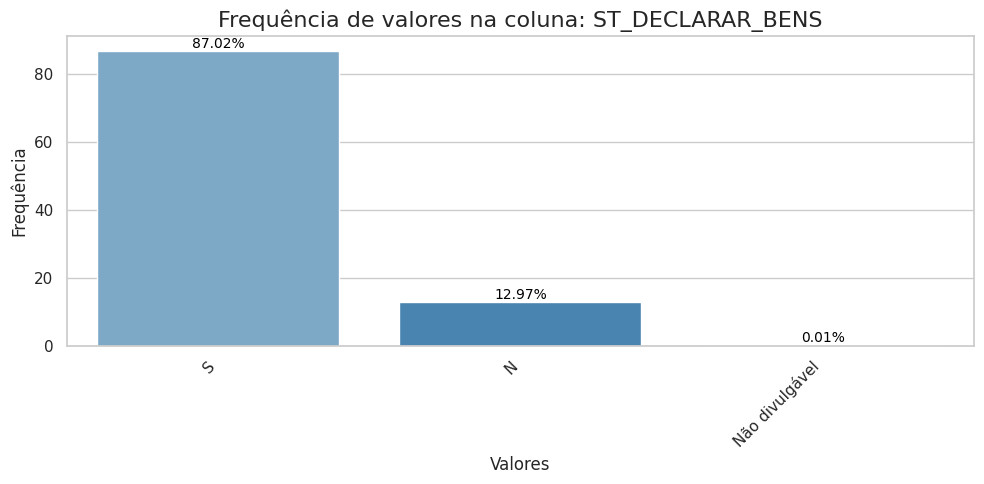

In [120]:
verificar_freq_colunas(df_cand_compl)

In [112]:
df_candidatos.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [116]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463367 entries, 0 to 463366
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SG_UF              463367 non-null  object        
 1   NM_UE              463367 non-null  object        
 2   DS_CARGO           463367 non-null  object        
 3   SQ_CANDIDATO       463367 non-null  int64         
 4   NR_CANDIDATO       463367 non-null  int64         
 5   NM_CANDIDATO       463367 non-null  object        
 6   NM_URNA_CANDIDATO  463366 non-null  object        
 7   SG_PARTIDO         463367 non-null  object        
 8   SG_UF_NASCIMENTO   463367 non-null  object        
 9   DT_NASCIMENTO      463321 non-null  datetime64[ns]
 10  DS_GENERO          463367 non-null  object        
 11  DS_GRAU_INSTRUCAO  463367 non-null  object        
 12  DS_ESTADO_CIVIL    463367 non-null  object        
 13  DS_COR_RACA        463367 non-null  object  

In [121]:
df_cand_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463367 entries, 0 to 463366
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SQ_CANDIDATO             463367 non-null  int64  
 1   DS_NACIONALIDADE         463367 non-null  object 
 2   CD_MUNICIPIO_NASCIMENTO  463367 non-null  int64  
 3   NM_MUNICIPIO_NASCIMENTO  463367 non-null  object 
 4   NR_IDADE_DATA_POSSE      463324 non-null  float64
 5   ST_QUILOMBOLA            463367 non-null  object 
 6   CD_ETNIA_INDIGENA        463367 non-null  int64  
 7   DS_ETNIA_INDIGENA        463367 non-null  object 
 8   VR_DESPESA_MAX_CAMPANHA  463367 non-null  float64
 9   ST_REELEICAO             463367 non-null  object 
 10  ST_DECLARAR_BENS         463367 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 38.9+ MB


In [122]:
df_bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909759 entries, 0 to 909758
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   DT_GERACAO                  909759 non-null  object
 1   HH_GERACAO                  909759 non-null  object
 2   ANO_ELEICAO                 909759 non-null  int64 
 3   CD_TIPO_ELEICAO             909759 non-null  int64 
 4   NM_TIPO_ELEICAO             909759 non-null  object
 5   CD_ELEICAO                  909759 non-null  int64 
 6   DS_ELEICAO                  909759 non-null  object
 7   DT_ELEICAO                  909759 non-null  object
 8   SG_UF                       909759 non-null  object
 9   SG_UE                       909759 non-null  int64 
 10  NM_UE                       909759 non-null  object
 11  SQ_CANDIDATO                909759 non-null  int64 
 12  NR_ORDEM_BEM_CANDIDATO      909759 non-null  int64 
 13  CD_TIPO_BEM_CANDIDATO       9

In [123]:
def transform_data(data):
  #Convertendo as Datas para o formato correto
  #data = df
  for col in data.columns:
    if col.startswith('DT_'):
        data[col] = pd.to_datetime(data[col], format='%d/%m/%Y', errors='coerce')
        #Para datas inválidas, aplica-se Nat
  # Excluir todas as colunas que começam com CD
  data.drop(columns=[col for col in data.columns if col.startswith('CD')],axis=1,inplace=True)

  for col in data.columns:
    if col.startswith('VR_'):
        data[col] = data[col].str.replace('.', '', regex=False)
        data[col] = df_bens_cand[col].str.replace(',', '.', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

  return data



In [124]:

df_candidatos = transform_data(df_candidatos)

df_candidatos.head()


SG_UF       NM_UE  DS_CARGO  SQ_CANDIDATO  NR_CANDIDATO  \
0    AC  RIO BRANCO  VEREADOR   10001902483         10444   
1    AC  RIO BRANCO  VEREADOR   10001922371         44321   
2    AC  PORTO ACRE  VEREADOR   10001984872         22345   
3    AC  ACRELÂNDIA  VEREADOR   10001984531         22555   
4    AC  RIO BRANCO  VEREADOR   10001991098         15123   

                           NM_CANDIDATO NM_URNA_CANDIDATO    SG_PARTIDO  \
0  FELIPE HENRIQUE DO NASCIMENTO BASTOS     FELIPE MENDES  REPUBLICANOS   
1                  MICHELLE SOARES MAIA     MICHELLE MAIA         UNIÃO   
2                DHONY DOS SANTOS GOMES       DHONY GOMES            PL   
3           VALDINARA PIRES DE OLIVEIRA               VAL            PL   
4           EDVALDO ALMEIDA DE OLIVEIRA     NENEM ALMEIDA           MDB   

  SG_UF_NASCIMENTO DT_NASCIMENTO  DS_GENERO            DS_GRAU_INSTRUCAO  \
0               AC    1995-09-27  MASCULINO        ENSINO MÉDIO COMPLETO   
1               AC    1989-02-10   FEMININO        ENSINO MÉDIO COMPLETO   
2               AC    1984-08-10  MASCULINO            SUPERIOR COMPLETO   
3               AC    1985-06-04   FEMININO  ENSINO FUNDAMENTAL COMPLETO   
4               AC    1969-12-25  MASCULINO            SUPERIOR COMPLETO   

  DS_ESTADO_CIVIL DS_COR_RACA DS_OCUPACAO  
0     SOLTEIRO(A)       PARDA      OUTROS  
1     SOLTEIRO(A)       PARDA  AGRICULTOR  
2       CASADO(A)       PARDA      OUTROS  
3   DIVORCIADO(A)       PARDA      OUTROS  
4       CASADO(A)       PARDA      OUTROS

In [125]:
df_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463367 entries, 0 to 463366
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   SG_UF              463367 non-null  object        
 1   NM_UE              463367 non-null  object        
 2   DS_CARGO           463367 non-null  object        
 3   SQ_CANDIDATO       463367 non-null  int64         
 4   NR_CANDIDATO       463367 non-null  int64         
 5   NM_CANDIDATO       463367 non-null  object        
 6   NM_URNA_CANDIDATO  463366 non-null  object        
 7   SG_PARTIDO         463367 non-null  object        
 8   SG_UF_NASCIMENTO   463367 non-null  object        
 9   DT_NASCIMENTO      463321 non-null  datetime64[ns]
 10  DS_GENERO          463367 non-null  object        
 11  DS_GRAU_INSTRUCAO  463367 non-null  object        
 12  DS_ESTADO_CIVIL    463367 non-null  object        
 13  DS_COR_RACA        463367 non-null  object  

In [126]:
df_cand_compl.columns

Index(['SQ_CANDIDATO', 'DS_NACIONALIDADE', 'CD_MUNICIPIO_NASCIMENTO',
       'NM_MUNICIPIO_NASCIMENTO', 'NR_IDADE_DATA_POSSE', 'ST_QUILOMBOLA',
       'CD_ETNIA_INDIGENA', 'DS_ETNIA_INDIGENA', 'VR_DESPESA_MAX_CAMPANHA',
       'ST_REELEICAO', 'ST_DECLARAR_BENS'],
      dtype='object')

In [127]:
object_columns = df_cand_compl.select_dtypes(include='object').columns

# Substituir '#NULO#' por NaN nas colunas do tipo object
df_cand_compl[object_columns] = df_cand_compl[object_columns].replace('#NULO#', np.nan)
df_cand_compl[object_columns] = df_cand_compl[object_columns].replace('NÃO INFORMADO', np.nan)


In [128]:
df_cand_compl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463367 entries, 0 to 463366
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   SQ_CANDIDATO             463367 non-null  int64  
 1   DS_NACIONALIDADE         463367 non-null  object 
 2   CD_MUNICIPIO_NASCIMENTO  463367 non-null  int64  
 3   NM_MUNICIPIO_NASCIMENTO  463367 non-null  object 
 4   NR_IDADE_DATA_POSSE      463324 non-null  float64
 5   ST_QUILOMBOLA            463367 non-null  object 
 6   CD_ETNIA_INDIGENA        463367 non-null  int64  
 7   DS_ETNIA_INDIGENA        2117 non-null    object 
 8   VR_DESPESA_MAX_CAMPANHA  463367 non-null  float64
 9   ST_REELEICAO             463367 non-null  object 
 10  ST_DECLARAR_BENS         463367 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 38.9+ MB


In [129]:
df_bens_cand = transform_data(df_bens_cand)

df_bens_cand.head()


DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
0 2024-09-28   08:30:26         2024  Eleição Ordinária   
1 2024-09-28   08:30:26         2024  Eleição Ordinária   
2 2024-09-28   08:30:26         2024  Eleição Ordinária   
3 2024-09-28   08:30:26         2024  Eleição Ordinária   
4 2024-09-28   08:30:26         2024  Eleição Ordinária   

                 DS_ELEICAO DT_ELEICAO SG_UF  SG_UE    NM_UE  SQ_CANDIDATO  \
0  Eleições Municipais 2024 2024-10-06    SP  62294  BIRIGUI  250002223747   
1  Eleições Municipais 2024 2024-10-06    SP  62294  BIRIGUI  250002223751   
2  Eleições Municipais 2024 2024-10-06    SP  62294  BIRIGUI  250002223751   
3  Eleições Municipais 2024 2024-10-06    SP  62294  BIRIGUI  250002223751   
4  Eleições Municipais 2024 2024-10-06    SP  62294  BIRIGUI  250002223751   

   NR_ORDEM_BEM_CANDIDATO          DS_TIPO_BEM_CANDIDATO  \
0                       7  Quotas ou quinhões de capital   
1                       5  Quotas ou quinhões de capital   
2                       6  Quotas ou quinhões de capital   
3                       7  Quotas ou quinhões de capital   
4                       8  Quotas ou quinhões de capital   

                              DS_BEM_CANDIDATO  VR_BEM_CANDIDATO  \
0                         COTAS CAPITAL SICOOB          936.3800   
1  QUOTAS CAPITAL FIRMA APIARIO IND E COM LTDA            1.0000   
2            COOP AGRICOLA MISTA DE ADAMANTINA          603.3500   
3                      CAPITAL SOCIAL - SICOOB        2,129.7200   
4                      SICOOB - CAPITAL SOCIAL       28,885.6900   

  DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
0                 2024-09-22                   08:53:05  
1                 2024-09-22                   08:53:05  
2                 2024-09-22                   08:53:05  
3                 2024-09-22                   08:53:05  
4                 2024-09-22                   08:53:05

In [130]:
df_bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909759 entries, 0 to 909758
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   DT_GERACAO                  909759 non-null  datetime64[ns]
 1   HH_GERACAO                  909759 non-null  object        
 2   ANO_ELEICAO                 909759 non-null  int64         
 3   NM_TIPO_ELEICAO             909759 non-null  object        
 4   DS_ELEICAO                  909759 non-null  object        
 5   DT_ELEICAO                  909759 non-null  datetime64[ns]
 6   SG_UF                       909759 non-null  object        
 7   SG_UE                       909759 non-null  int64         
 8   NM_UE                       909759 non-null  object        
 9   SQ_CANDIDATO                909759 non-null  int64         
 10  NR_ORDEM_BEM_CANDIDATO      909759 non-null  int64         
 11  DS_TIPO_BEM_CANDIDATO       909759 non-

In [131]:
df_bens_cand.describe()

DT_GERACAO  ANO_ELEICAO           DT_ELEICAO        SG_UE  \
count               909759 909,759.0000               909759 909,759.0000   
mean   2024-09-28 00:00:00   2,024.0000  2024-10-06 00:00:00  57,828.1361   
min    2024-09-28 00:00:00   2,024.0000  2024-10-06 00:00:00      19.0000   
25%    2024-09-28 00:00:00   2,024.0000  2024-10-06 00:00:00  40,207.0000   
50%    2024-09-28 00:00:00   2,024.0000  2024-10-06 00:00:00  62,910.0000   
75%    2024-09-28 00:00:00   2,024.0000  2024-10-06 00:00:00  81,000.0000   
max    2024-09-28 00:00:00   2,024.0000  2024-10-06 00:00:00  99,074.0000   
std                    NaN       0.0000                  NaN  27,243.8199   

              SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO        VR_BEM_CANDIDATO  \
count         909,759.0000            909,759.0000            909,759.0000   
mean  165,121,783,810.8221                  4.4325         27,020,852.7145   
min    10,001,885,335.0000                  1.0000                  0.0000   
25%   130,001,900,391.0000                  1.0000              8,500.0000   
50%   160,002,169,836.0000                  2.0000             32,000.0000   
75%   240,002,015,349.0000                  4.0000            100,000.0000   
max   270,002,399,908.0000                351.0000 24,448,100,150,781.0000   
std    66,899,998,283.8554                  9.1999     25,631,969,898.0016   

          DT_ULT_ATUAL_BEM_CANDIDATO  
count                         909759  
mean   2024-09-19 03:11:20.283460352  
min              2024-08-20 00:00:00  
25%              2024-09-18 00:00:00  
50%              2024-09-18 00:00:00  
75%              2024-09-21 00:00:00  
max              2024-09-28 00:00:00  
std                              NaN

In [132]:
import plotly.graph_objects as go

# Criando o boxplot
fig = go.Figure()

median_a = df_bens_cand['VR_BEM_CANDIDATO'].median()

fig.add_trace(go.Box(y=df_bens_cand['VR_BEM_CANDIDATO'], name='Valor do Bem'))

fig.add_annotation(x=0, y=median_a, text=f'Mediana: {median_a}', showarrow=True, arrowhead=2, ax=-30, ay=0)

fig.update_layout(title='Boxplot - Valor do Bem')
fig.show()


In [133]:
df_bens_cand.sort_values('VR_BEM_CANDIDATO',ascending=False).head(20)

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
602512 2024-09-28   08:30:26         2024  Eleição Ordinária   
137018 2024-09-28   08:30:26         2024  Eleição Ordinária   
59325  2024-09-28   08:30:26         2024  Eleição Ordinária   
98154  2024-09-28   08:30:26         2024  Eleição Ordinária   
54166  2024-09-28   08:30:26         2024  Eleição Ordinária   
...           ...        ...          ...                ...   
526101 2024-09-28   08:30:26         2024  Eleição Ordinária   
526306 2024-09-28   08:30:26         2024  Eleição Ordinária   
526971 2024-09-28   08:30:26         2024  Eleição Ordinária   
527959 2024-09-28   08:30:26         2024  Eleição Ordinária   
382446 2024-09-28   08:30:26         2024  Eleição Ordinária   

                      DS_ELEICAO DT_ELEICAO SG_UF  SG_UE               NM_UE  \
602512  Eleições Municipais 2024 2024-10-06    PR  79090            TAMBOARA   
137018  Eleições Municipais 2024 2024-10-06    MG  46256            IPATINGA   
59325   Eleições Municipais 2024 2024-10-06    SP  66818             MARÍLIA   
98154   Eleições Municipais 2024 2024-10-06    PA   4723               ANAPU   
54166   Eleições Municipais 2024 2024-10-06    RS  86258         DOIS IRMÃOS   
...                          ...        ...   ...    ...                 ...   
526101  Eleições Municipais 2024 2024-10-06    RS  86959             HUMAITÁ   
526306  Eleições Municipais 2024 2024-10-06    PR  75345  FERNANDES PINHEIRO   
526971  Eleições Municipais 2024 2024-10-06    PR  75523    PONTAL DO PARANÁ   
527959  Eleições Municipais 2024 2024-10-06    GO  93254          CRISTALINA   
382446  Eleições Municipais 2024 2024-10-06    SP  66036        JARDINÓPOLIS   

        SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO  \
602512  160002381679                       1   
137018  130002211844                       2   
59325   250001937618                       1   
98154   140002233548                       1   
54166   210002201027                       4   
...              ...                     ...   
526101  210002312147                      46   
526306  160002316707                       2   
526971  160002341753                       7   
527959   90002179847                       2   
382446  250002325993                       6   

                                    DS_TIPO_BEM_CANDIDATO  \
602512  Veículo automotor terrestre: caminhão, automóv...   
137018  Ações (inclusive as provenientes de linha tele...   
59325                    Outras participações societárias   
98154                                 Outros bens imóveis   
54166                       Quotas ou quinhões de capital   
...                                                   ...   
526101  Veículo automotor terrestre: caminhão, automóv...   
526306                                            Terreno   
526971                                            Terreno   
527959                                            Terreno   
382446        Depósito bancário em conta corrente no País   

                                         DS_BEM_CANDIDATO  \
602512                                           VEICULOS   
137018                                         SWC-220845   
59325   VR DE 95% DAS COTAS DE CAPITAL DA EMPRESA SUGA...   
98154              Imóvel rural denominado sítio caujeira   
54166   1.532.580.097 QUOTAS NA EMPRESA RGSC AMBIENTAL...   
...                                                   ...   
526101               50% DO CAMINHÃO MARCA M. BENZ/L 1518   
526306  UM TERRENO URABANO LOCALIZADO EM IRATI/PR NA R...   
526971               DACAO EM PAGAMENTO DE TERRENO/FRACAO   
527959                    FAZENDA CAMPINAS 100 HA EM UNAÍ   
382446                                         Banco Itaú   

              VR_BEM_CANDIDATO DT_ULT_ATUAL_BEM_CANDIDATO  \
602512 24,448,100,150,781.0000                 2024-09-24   
137018     10,600,250,000.0000                 2024-09-18   
59325       2,850,000,000.0000                 2024

In [90]:
# Valor informado erroneamente 24,448,100,274,547.4297
max_val = float(df_bens_cand[['VR_BEM_CANDIDATO']].max())

print('O Produto Interno Bruto (PIB) do Brasil no ano de 2023 foi de aproximadamente R$ 10,9 trilhões. ')
print(f'Temos um candidato com {max_val} em bens?')

O Produto Interno Bruto (PIB) do Brasil no ano de 2023 foi de aproximadamente R$ 10,9 trilhões. 
Temos um candidato com 1532580097.0 em bens?


<ipython-input-90-79b97b721d61>:2: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



In [91]:
df_bens_cand[df_bens_cand['VR_BEM_CANDIDATO'] == max_val]

DT_GERACAO HH_GERACAO  ANO_ELEICAO    NM_TIPO_ELEICAO  \
54166 2024-09-28   08:30:26         2024  Eleição Ordinária   

                     DS_ELEICAO DT_ELEICAO SG_UF  SG_UE        NM_UE  \
54166  Eleições Municipais 2024 2024-10-06    RS  86258  DOIS IRMÃOS   

       SQ_CANDIDATO  NR_ORDEM_BEM_CANDIDATO          DS_TIPO_BEM_CANDIDATO  \
54166  210002201027                       4  Quotas ou quinhões de capital   

                                        DS_BEM_CANDIDATO   VR_BEM_CANDIDATO  \
54166  1.532.580.097 QUOTAS NA EMPRESA RGSC AMBIENTAL... 1,532,580,097.0000   

      DT_ULT_ATUAL_BEM_CANDIDATO HH_ULT_ATUAL_BEM_CANDIDATO  
54166                 2024-09-18                   12:43:23

In [84]:

#df_bens_cand = df_bens_cand[df_bens_cand['VR_BEM_CANDIDATO'] < max_val]


## Process


In [92]:
print(f'Observações no arquivo de candidatos {df_candidatos.shape[0]}')

print(f'Observações no arquivo de informação complementar do candidatos {df_cand_compl.shape[0]}')

print(f'Observações no arquivo de bens de candidatos {df_bens_cand.shape[0]}')



Observações no arquivo de candidatos 463367
Observações no arquivo de informação complementar do candidatos 463367
Observações no arquivo de bens de candidatos 909755


In [94]:
#Agrupar o valor dos bens por candidato
df_bens_cand_grouped = df_bens_cand.groupby('SQ_CANDIDATO').agg(
    Valor_Total=('VR_BEM_CANDIDATO', 'sum'),
    Quantidade=('VR_BEM_CANDIDATO', 'count')
).reset_index()

df_bens_cand_grouped.head()

SQ_CANDIDATO    Valor_Total  Quantidade
0   10001885335   685,000.0000           2
1   10001895176 1,098,000.0000           3
2   10001895177   461,000.0000           4
3   10001895178 1,030,000.0000           3
4   10001895180    10,000.0000           1

In [95]:
df_bens_cand_grouped.describe()

SQ_CANDIDATO        Valor_Total   Quantidade
count         295,846.0000       295,846.0000 295,846.0000
mean  159,652,932,655.1635       400,541.3084       3.0751
std    68,391,807,363.9611     7,456,416.6456       3.8379
min    10,001,885,335.0000             0.0000       1.0000
25%   110,002,338,557.5000        30,000.0000       1.0000
50%   160,001,920,773.5000       111,000.0000       2.0000
75%   220,002,326,814.7500       305,215.4575       4.0000
max   270,002,399,908.0000 1,542,273,922.2100     351.0000

## Analyze


## Share


## Act